In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import engine
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [3]:
df = pd.read_csv("ecommerce_product_dataset.csv")

In [5]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08


In [6]:
df.dtypes

ProductID          int64
ProductName       object
Category          object
Price            float64
Rating           float64
NumReviews         int64
StockQuantity      int64
Discount         float64
Sales              int64
DateAdded         object
dtype: object

In [7]:
df['DateAdded'] = pd.to_datetime(df['DateAdded'], utc=True, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   ProductID      1000 non-null   int64              
 1   ProductName    1000 non-null   object             
 2   Category       1000 non-null   object             
 3   Price          1000 non-null   float64            
 4   Rating         1000 non-null   float64            
 5   NumReviews     1000 non-null   int64              
 6   StockQuantity  1000 non-null   int64              
 7   Discount       1000 non-null   float64            
 8   Sales          1000 non-null   int64              
 9   DateAdded      1000 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(3), int64(4), object(2)
memory usage: 78.3+ KB


In [8]:
df['YearMonth'] = df['DateAdded'].dt.strftime('%Y-%m')

## Cuanto se facturó cada mes?

In [30]:
q = """ 
SELECT  (Price * Sales) as Facturacion_Mes, YearMonth, Sales
FROM df
GROUP BY YearMonth
ORDER BY YearMonth ASC
"""

Facturacion_Mensual = pysqldf(q)

In [25]:
Facturacion_Mensual

,Facturacion_Mes,YearMonth,Sales
0,130491.90,2023-06,269
1,565222.26,2023-07,1919
2,595267.92,2023-08,1508
3,313059.96,2023-09,1332
4,105310.80,2023-10,252
5,186544.46,2023-11,466
6,275776.20,2023-12,1806
7,292014.80,2024-01,1064
8,93092.26,2024-02,698
9,592560.60,2024-03,1762


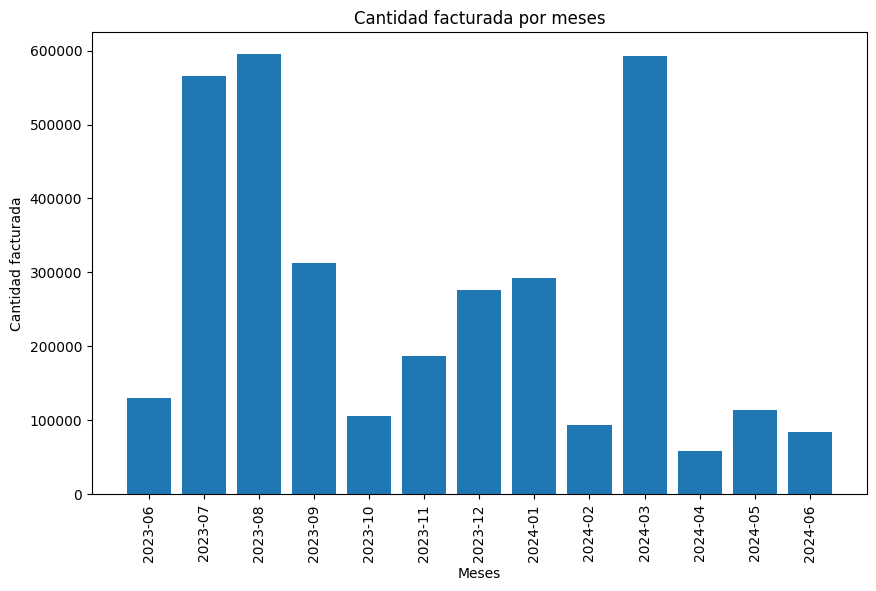

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(Facturacion_Mensual["YearMonth"], Facturacion_Mensual["Facturacion_Mes"])


plt.xlabel("Meses")
plt.ylabel("Cantidad facturada")
plt.title("Cantidad facturada por meses")

plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

In [37]:
df.head(20)

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,YearMonth
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08 00:00:00+00:00,2023-11
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26 00:00:00+00:00,2023-09
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18 00:00:00+00:00,2023-10
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03 00:00:00+00:00,2023-12
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08 00:00:00+00:00,2023-08
5,6,Headphones,Electronics,93.56,1.3,2435,600,0.48,241,2023-09-19 00:00:00+00:00,2023-09
6,7,Laptop,Electronics,57.86,3.7,1478,427,0.25,1966,2024-05-06 00:00:00+00:00,2024-05
7,8,Laptop,Electronics,201.62,1.7,3073,389,0.10,1795,2023-08-05 00:00:00+00:00,2023-08
8,9,Smartphone,Electronics,485.10,4.1,161,201,0.45,269,2023-06-25 00:00:00+00:00,2023-06
9,10,Smartwatch,Electronics,170.00,3.3,1275,701,0.16,719,2023-10-17 00:00:00+00:00,2023-10


## Cuales son los productos más vendidos de cada categoría y cuanto queda en Stock?

In [51]:
q = """ 
SELECT ProductID, ProductName, Category,max(Sales) as CantidadVendida, StockQuantity
FROM df
GROUP BY Category


"""

maxventa = pysqldf(q)

maxventa

,ProductID,ProductName,Category,CantidadVendida,StockQuantity
0,431,Sketchbook,Art and crafting materials,1995,197
1,742,Body Scrub,Bath and body,1983,663
2,625,Silk Sheets,Bedsheets,1991,601
3,381,Mountain Bike,Bicycles,1958,788
4,989,Throw Blanket,Blankets,1969,160
5,146,Biography,Books,1935,119
6,691,Beeswax Candle,Candles,1942,751
7,50,T-Shirt,Clothing,1853,740
8,341,Rain Jacket,Coats and jackets,1959,85
9,792,Grill Pan,Cookware,1963,698


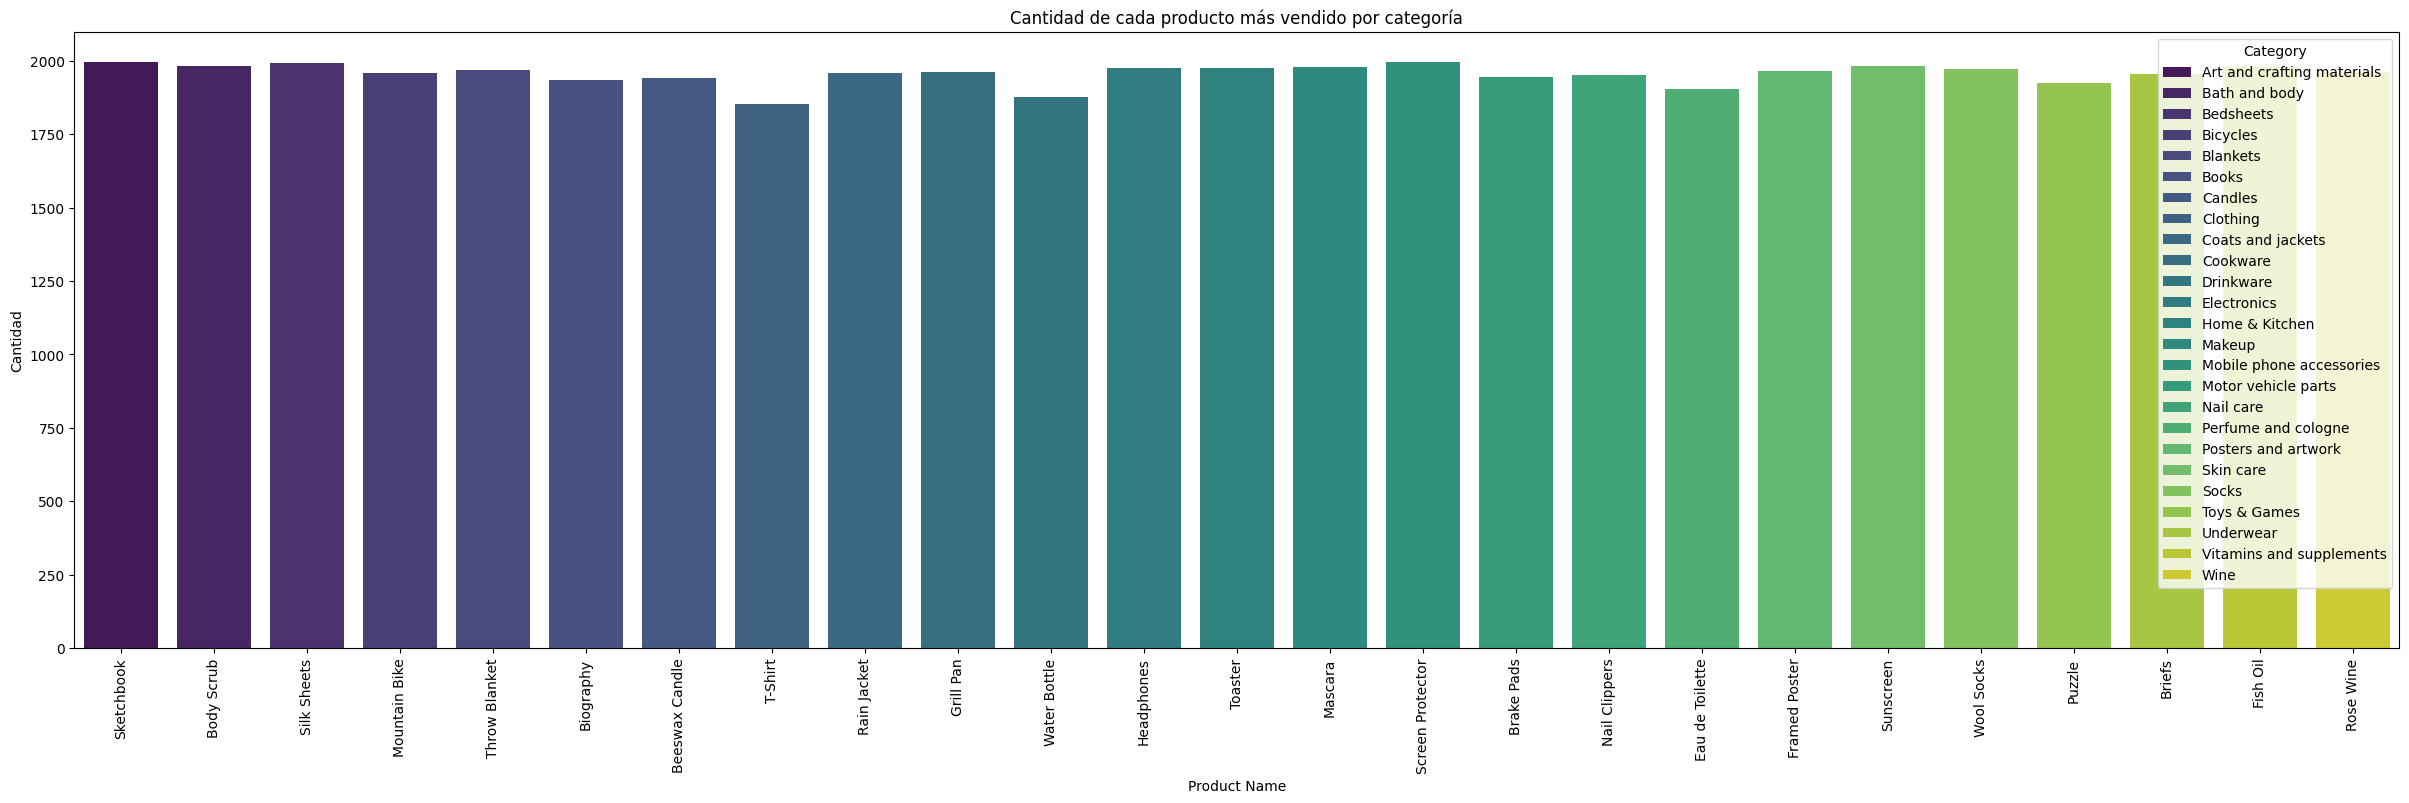

In [52]:
plt.figure(figsize=(30, 8))
sns.barplot(x='ProductName', y='CantidadVendida', hue='Category', data=maxventa, palette='viridis')
plt.title('Cantidad de cada producto más vendido por categoría')
plt.xlabel('Product Name')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

## Cuál es el rating promedio por categoria?

In [54]:
q = """ 
SELECT Category, AVG(Rating) as RatingProm
FROM df
GROUP BY Category
"""

ratingPromedio = pysqldf(q)

ratingPromedio

,Category,RatingProm
0,Art and crafting materials,2.9650
1,Bath and body,2.9525
2,Bedsheets,3.0275
3,Bicycles,3.0025
4,Blankets,3.2150
5,Books,3.0675
6,Candles,2.8050
7,Clothing,2.9475
8,Coats and jackets,3.4325
9,Cookware,3.0075


Igual ni siquiera hace falta hacerlo con SQL, con Pandas se puede hacer directamente el gráfico como se muestra abajo.

C:\Users\franc\AppData\Local\Temp\ipykernel_15984\869932274.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Rating', data=df, errorbar=None, palette=palette)
C:\Users\franc\AppData\Local\Temp\ipykernel_15984\869932274.py:3: UserWarning: 
The palette list has fewer values (6) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Category', y='Rating', data=df, errorbar=None, palette=palette)


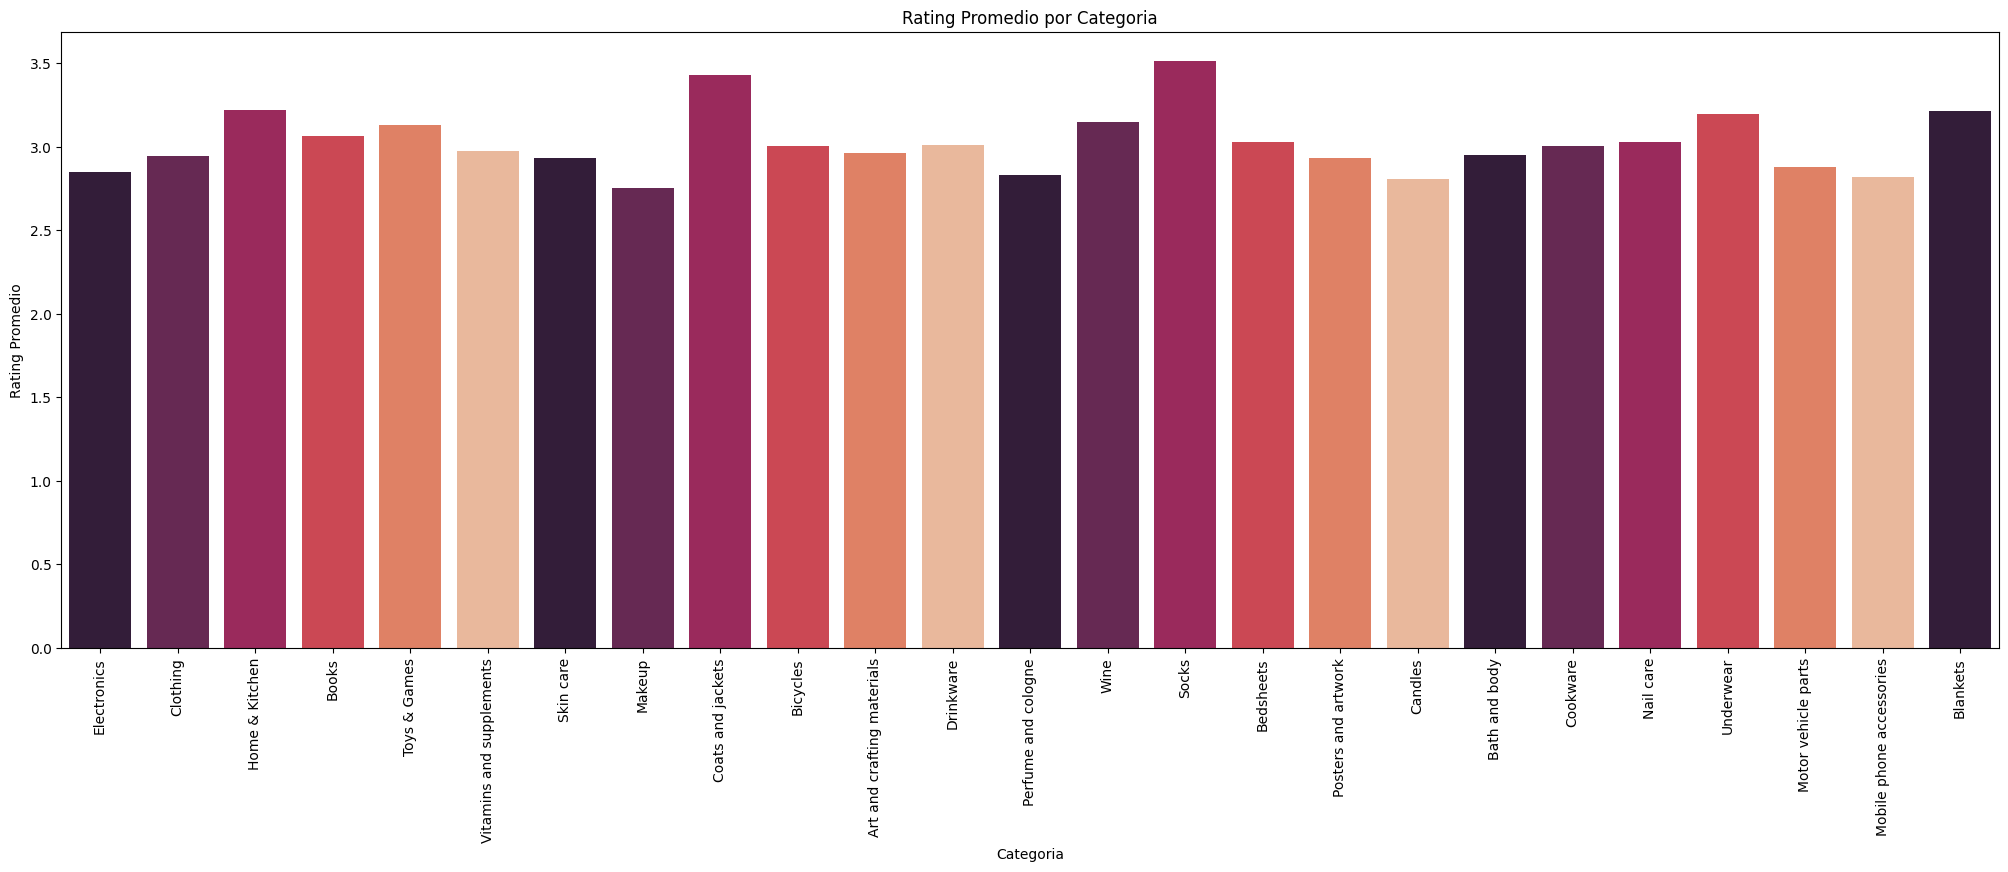

In [55]:
plt.figure(figsize=(25, 8))
palette = sns.color_palette("rocket")
sns.barplot(x='Category', y='Rating', data=df, errorbar=None, palette=palette)
plt.title('Rating Promedio por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Rating Promedio')
plt.xticks(rotation=90)

plt.show()

## Cuales son los 10 productos más vendidos en general? 

In [63]:
q = """ 
SELECT ProductName,ProductID, Max(Sales) as Ventas
FROM df
GROUP BY ProductName
ORDER BY  Ventas Desc
Limit 10
"""

maximas = pysqldf(q)

maximas

,ProductName,ProductID,Ventas
0,Screen Protector,944,1997
1,Sketchbook,431,1995
2,Silk Sheets,625,1991
3,Earbuds,932,1984
4,Linen Sheets,615,1983
5,Body Scrub,742,1983
6,Sunscreen,241,1981
7,Mascara,281,1979
8,Fish Oil,201,1978
9,Toaster,104,1976


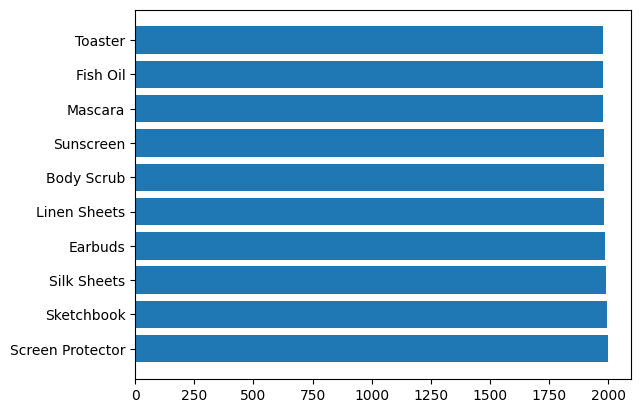

In [62]:
plt.barh(maximas["ProductName"], maximas["Ventas"]) 

plt.show()

## Pero ... Ese gráfico nos muestra los Productos individuales (Por eso se muestra el productID) que mas vendieron. Pero hay muchos screen protectors distintos por ejemplo. Podemos fusionar las ventas de cada producto que se llame igual y ver qué tipo producto vendió más en general?

In [69]:
top_ventas = df.groupby('ProductName').agg({'Sales': 'sum'}).reset_index().sort_values(by='Sales', ascending=False).head(10)

In [71]:
top_ventas

,ProductName,Sales
6,Biography,23947
54,Mountain Bike,20069
21,Cleanser,15886
82,Spark Plugs,15745
89,Throw Blanket,15315
93,Vitamin D,15239
42,Headphones,15116
32,Eau de Toilette,14820
27,Denim Jacket,14472
61,Paint Set,14455


En SQL sería asi

In [72]:
q = """ 
SELECT ProductName, sum(Sales) as Saless
FROM df
GROUP BY ProductName
ORDER BY Saless Desc
LIMIT 10
"""

top_ventasss = pysqldf(q)

top_ventasss

,ProductName,Saless
0,Biography,23947
1,Mountain Bike,20069
2,Cleanser,15886
3,Spark Plugs,15745
4,Throw Blanket,15315
5,Vitamin D,15239
6,Headphones,15116
7,Eau de Toilette,14820
8,Denim Jacket,14472
9,Paint Set,14455


C:\Users\franc\AppData\Local\Temp\ipykernel_15984\856045809.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='ProductName', data=top_ventas, errorbar=None, palette=palette)
C:\Users\franc\AppData\Local\Temp\ipykernel_15984\856045809.py:3: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Sales', y='ProductName', data=top_ventas, errorbar=None, palette=palette)


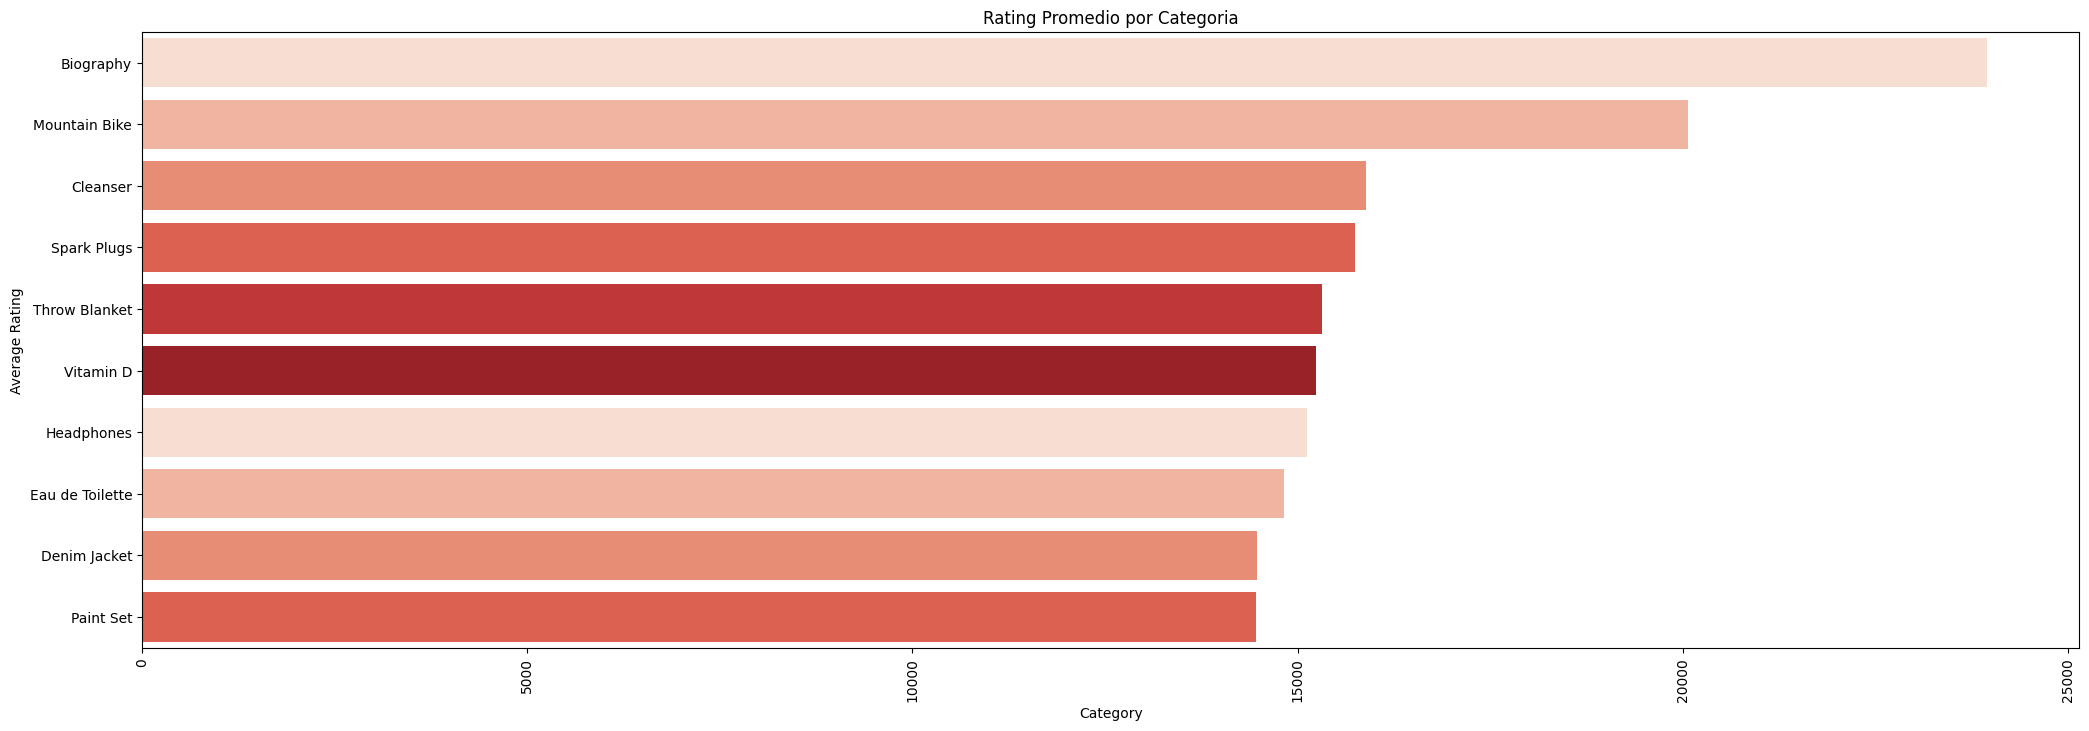

In [70]:
plt.figure(figsize=(25, 8))
palette = sns.color_palette("Reds")
sns.barplot(x='Sales', y='ProductName', data=top_ventas, errorbar=None, palette=palette)
plt.title('Ventas por producto en general')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)

plt.show()

## Cómo cambiaron las ventas a medida que pasó el tiempo?

In [73]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,YearMonth
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08 00:00:00+00:00,2023-11
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26 00:00:00+00:00,2023-09
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18 00:00:00+00:00,2023-10
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03 00:00:00+00:00,2023-12
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08 00:00:00+00:00,2023-08


In [91]:
q = """ 
SELECT YearMonth, sum(Sales) as Cantidad_Ventas
FROM df
GROUP BY YearMonth
ORDER By YearMonth ASC
"""

cantidadventas = pysqldf(q)

cantidadventas

,YearMonth,Cantidad_Ventas
0,2023-06,41492
1,2023-07,100077
2,2023-08,90873
3,2023-09,93981
4,2023-10,72903
5,2023-11,89842
6,2023-12,87674
7,2024-01,79643
8,2024-02,75566
9,2024-03,88789


En Python seria asi

In [90]:
cantidadventasss = df.groupby("YearMonth").agg({'Sales':'sum'}).reset_index().sort_values(by='YearMonth', ascending=True).head(10)


cantidadventasss

,YearMonth,Sales
0,2023-06,41492
1,2023-07,100077
2,2023-08,90873
3,2023-09,93981
4,2023-10,72903
5,2023-11,89842
6,2023-12,87674
7,2024-01,79643
8,2024-02,75566
9,2024-03,88789


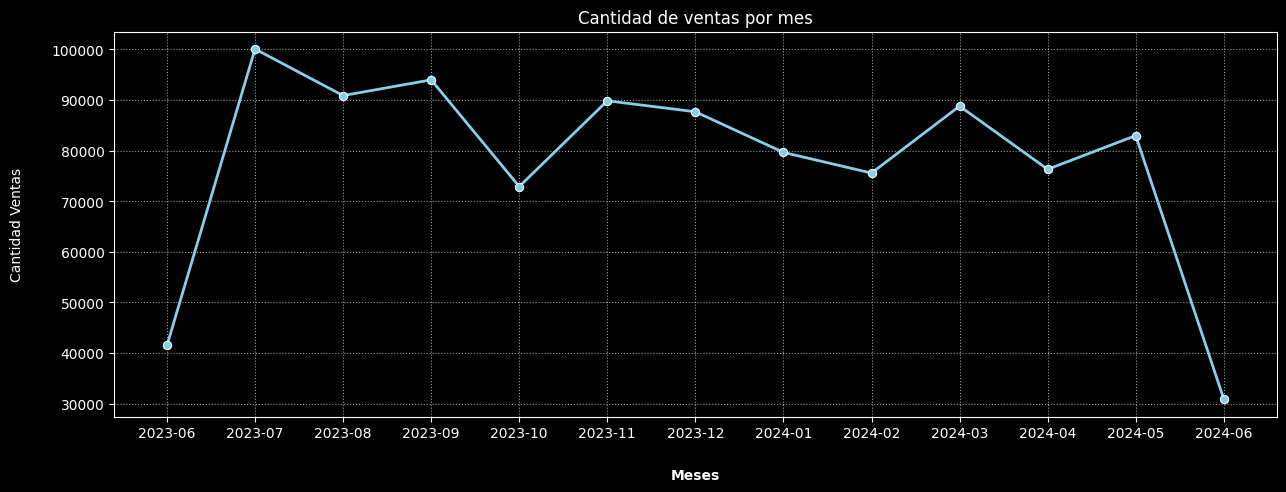

In [130]:
plt.figure(figsize=(15, 5))
plt.style.use('dark_background')
sns.lineplot(x='YearMonth', y='Cantidad_Ventas', data=cantidadventas, 
             linewidth=2, marker='o', markersize=6, color='skyblue')
plt.grid(True, linestyle=':', alpha=0.6, color='w')
plt.title('Cantidad de ventas por mes')
plt.xlabel('Meses', labelpad=20,weight = "bold")
plt.ylabel('Cantidad Ventas', labelpad=20)
plt.show()
